In [193]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

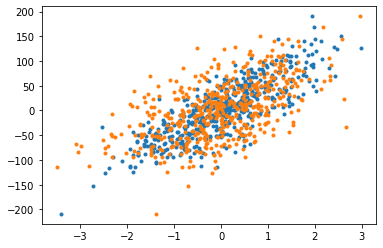

(375, 2) (375,)


In [194]:
x, y = make_regression(n_samples = 500, n_features = 2, bias = 1.1, noise = 1.2)
plt.plot(x, y, '.')
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape)

In [195]:
def hypothesis(x, w):
    W = w[1:]
    h=0
    h += np.sum(W*x,axis=0)
    #for i in range(x.shape[0]):
    #    h += W[i]*x[i]
    return h+w[0]

In [196]:
def loss(x, w, y_True):
    err = 0.0
    m = x.shape[0]
    for i in range(m):
        err += (hypothesis(x[i],w) - y_True[i])**2
    err /= (2*m)
    #print(err)
    return err

In [197]:
def find_gradient(x, w, y_true):
    grad = np.zeros(w.shape[0])
    #print(grad.shape[0])
    m = x.shape[0]
    for i in range(w.shape[0]):
        if(i==0):
            for j in range(m):
                grad[i] += (y_true[j] - hypothesis(x[j], w)) *1
        else:
            for j in range(m):
                grad[i] += (y_true[j] - hypothesis(x[j], w)) * (x[j][i-1])
    grad /= (2*m)
    return grad

In [198]:
def gradient_descent(x, w, y_true, learning_rate = 0.01):
    err = loss(x, w, y_true)
    w += find_gradient(x, w, y_true)
    return w,err    

Weights Initialized: [ 0.37614829 -1.05129456 -0.02830285]
Loss Plot: 


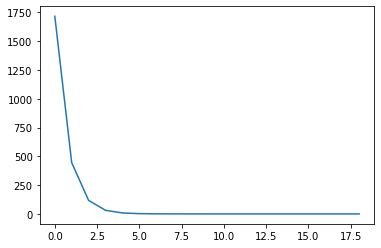

Final Weights: [ 1.23098093 48.44066876 32.39003128]
Iterations: 19


In [232]:
weights = np.array(np.random.randn(1))
weights = np.append(weights, np.zeros(x.shape[1]) + np.random.randn(x.shape[1]))
print("Weights Initialized: {}".format(weights))
los = []
n=0
threshold = 10e-7
while(True):
    n +=1
    weights, err = gradient_descent(x_train, weights, y_train, learning_rate = 0.5)
    los.append(err)
    if(len(los)>=2):
        if(abs(los[-1] - los[-2])<(threshold)):
            break
print("Loss Plot: {}".format(""))
plt.plot(los)
plt.show()
print("Final Weights: {}".format(weights))
print("Iterations: {}".format(n))

In [200]:
#print(x_test.shape)
print(weights[0]+np.sum((x_test[74]*weights[1:])))
print(y_test[74])

35.51750341933079
36.655795352958236
